## **#Install Required Libraries:**


In [1]:
!pip install torch
!pip install torch-geometric
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00


## **#Load and Explore the Cora Dataset**

## **#Load the Cora Dataset**

In [2]:
import torch
from torch_geometric.datasets import Planetoid
# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
# Access the data
data = dataset[0]
print(data)

Processing...


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Done!


## **#Perform Basic Data Preprocessing and EDA**

# **#Basic Exploration:**

In [6]:
# Basic information about the dataset
print(f"Dataset: {dataset}:")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of features: {dataset.num_features}")
print(f"Number of classes: {dataset.num_classes}")

# Basic information about the first graph
print(data)
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {data.num_edges / data.num_nodes:.2f}")
print(f"Number of training nodes: {data.train_mask.sum()}")
print(f"Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}")
print(f"Contains isolated nodes: {data.has_isolated_nodes()}")
print(f"Contains self-loops: {data.has_self_loops()}")
print(f"Is undirected: {data.is_undirected()}")


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## **#Basic Data Preprocessing:**

In [7]:
import pandas as pd
# Convert node features and labels to pandas DataFrame
node_features = data.x.numpy()
node_labels = data.y.numpy()
df = pd.DataFrame(node_features)
df['label'] = node_labels
print(df.head())

     0    1    2    3    4    5    6    7    8    9  ...  1424  1425  1426  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   1427  1428  1429  1430  1431  1432  label  
0   0.0   0.0   0.0   0.0   0.0   0.0      3  
1   0.0   0.0   0.0   0.0   0.0   0.0      4  
2   0.0   0.0   0.0   0.0   0.0   0.0      4  
3   0.0   0.0   0.0   0.0   0.0   0.0      0  
4   0.0   0.0   0.0   0.0   0.0   0.0      3  

[5 rows x 1434 columns]


## **#Exploratory Data Analysis (EDA):**

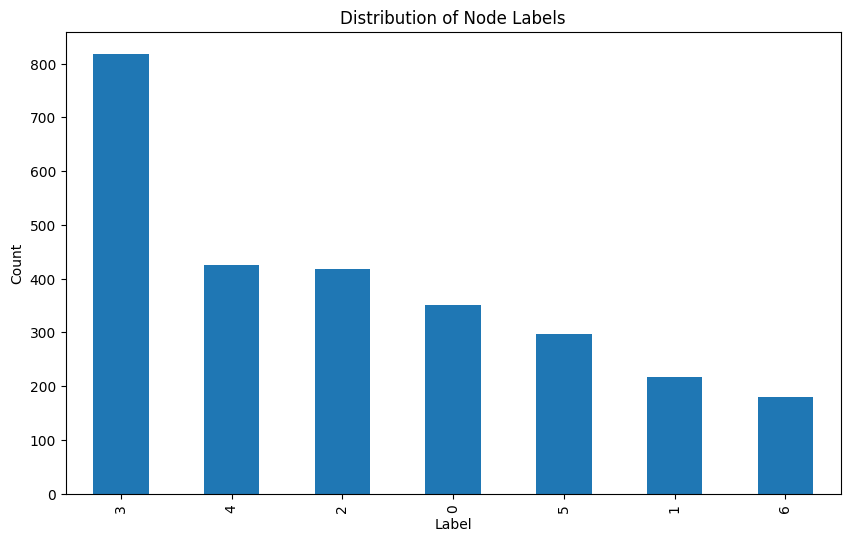

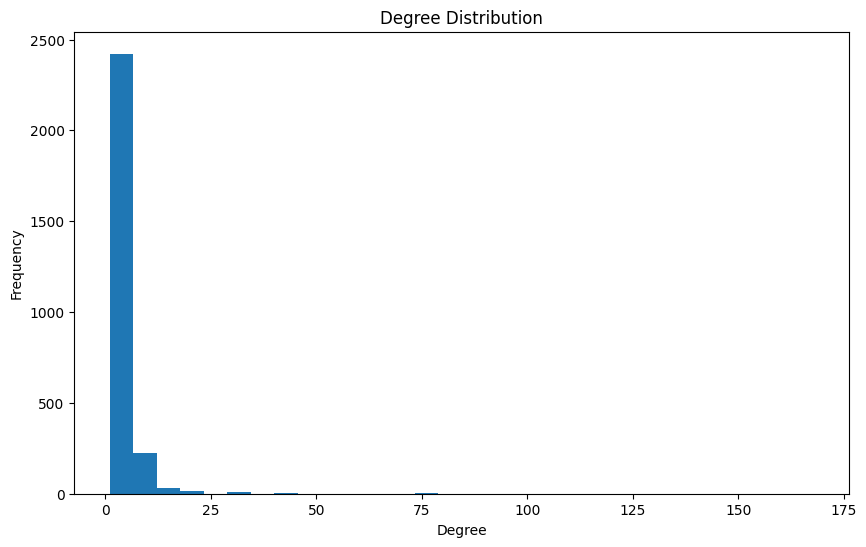

6

In [8]:
import matplotlib.pyplot as plt
# Distribution of node labels
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Node Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
# Example of plotting the degree distribution
from collections import Counter
degrees = dict(Counter(data.edge_index[0].numpy()))
plt.figure(figsize=(10, 6))
plt.hist(degrees.values(), bins=30)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
6